In [1]:
# Importing the Qiskit standard library and setting up an account
# Version: qiskit 2.2.1 ; Python 3.13.8  it should work !!
import math
from math import sqrt
from numpy import pi 
from qiskit import *
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import *

In [2]:
# Choosing a quantum simulator (or processor).
# backend = BasicAer.get_backend('qasm_simulator')
backend = AerSimulator(method='unitary')

In [3]:
# utest = Operator(Oracle Uf)
utest=Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/sqrt(2), -1/sqrt(2)], [0, 0, 1/sqrt(2), 1/sqrt(2)]])
Operator.is_unitary(utest) # or utest.is_unitary()

True

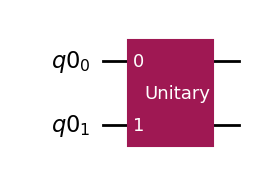

In [4]:
# Creating quantum, classical registers and a quantum circuit
n0=2 # Number of qubits and bits
q0 = QuantumRegister(n0) # Quantum Register
# c0 = ClassicalRegister(n0) # Classical Register
Utest = QuantumCircuit(q0,name='Uf') # Quantum algorithm - quantum circuit
Utest.append(utest,[0,1])
Utest.draw(output='mpl') # Quantum circuit sketch


In [5]:
Uf=Utest.to_gate()

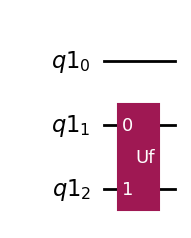

In [6]:
# Creating quantum, classical registers and a quantum circuit
n=3 # Number of qubits and bits
q = QuantumRegister(n) # Quantum Register
# c = ClassicalRegister(n) # Classical Register
# circuit0 = QuantumCircuit(q, c) # Algorytm kwantowy - kwantowy obwód
Circuit = QuantumCircuit(q) # Quantum algorithm - quantum circuit
Circuit.append(Uf,[q[1],q[2]])
Circuit.draw(output='mpl') # Quantum circuit sketch

In [7]:
Operator(Circuit)

Operator([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.70710678+0.j,  0.        +0.j,
           -0.70710678+0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j

In [8]:
Operator(Circuit).to_matrix()

array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.      

In [9]:
print(backend.configuration().basis_gates) # basis gates in used backend

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'delay', 'reset', 'save_state', 'save_unitary', 'set_unitary']


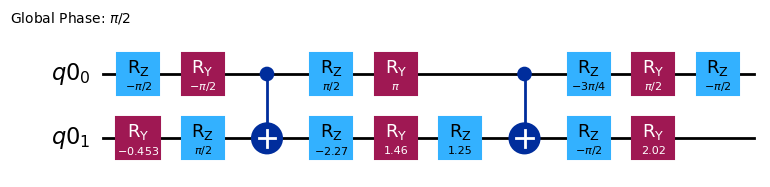

In [10]:
circuit0_transpile=transpile(Utest, basis_gates=['rz', 'ry', 'cx']) # see Lecture 4 and 5, decomposition of unitary transformations into such quantum gates that are understood by a quantum compiler
circuit0_transpile.draw(output='mpl') 

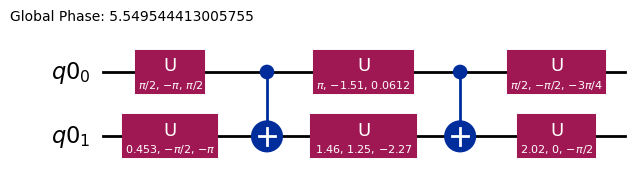

In [11]:
circuit0_decomp=Utest.decompose(reps=2) # see Lecture 4 and 5, decomposition Utest into such quantum gates that are understood by a quantum compiler 
circuit0_decomp.draw(output='mpl') 

In [12]:
# Copy of the circuit not to modify the original one
circuit_to_run = circuit0_transpile.copy()

# Important: In new Aer we need to manually save unitary matrix
circuit_to_run.save_unitary()

# New method of running in Qiskit 1.0+ / 2.0+
job = backend.run(circuit_to_run)
results = job.result()

# Getting the results
print(results.get_unitary(circuit_to_run, decimals=3))

Operator([[ 1.   +0.j,  0.   -0.j,  0.   -0.j,  0.   -0.j],
          [-0.   -0.j,  1.   +0.j, -0.   +0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707+0.j, -0.707-0.j],
          [-0.   -0.j, -0.   -0.j,  0.707+0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [13]:
circuit_to_run_decomp = circuit0_decomp.copy()
circuit_to_run_decomp.save_unitary()

job = backend.run(circuit_to_run_decomp)
results = job.result()

print(results.get_unitary(circuit_to_run_decomp, decimals=3))

Operator([[ 1.   +0.j,  0.   -0.j,  0.   -0.j,  0.   +0.j],
          [-0.   -0.j,  1.   +0.j,  0.   -0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707+0.j, -0.707-0.j],
          [-0.   -0.j, -0.   -0.j,  0.707+0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [14]:
145203 %64

51

In [15]:
136225 %64

33